In [1]:
import pandas as pd

In [3]:
filepath_gdp = 'WorldBankPy/gdp_DATA/transformed_data_gdp.csv'
filepath_hdev = 'HumanDevelopmentPy/human_development_data.csv'

In [4]:
gdp_df = pd.read_csv(filepath_gdp)
gdp_df.head()

,Unnamed: 0,Year,Country Name,Country Code,GDP USD
0,0,1990.0,Afghanistan,AFG,NaN
1,1,1990.0,Albania,ALB,6.042858e+09
2,2,1990.0,Algeria,DZA,9.201841e+10
3,3,1990.0,American Samoa,ASM,NaN
4,4,1990.0,Andorra,AND,1.930181e+09


In [5]:
hdev_df = pd.read_csv(filepath_hdev)
hdev_df.head()

,Country,Year,61006,43606,185606,185506,137906,137506,128306,68606,53506,52306,46006,44206,23806
0,ARE,2010,0.8,68.00,99.0,96.0,NaN,0.821,NaN,0.231,3.036,NaN,127.790,8.550,64.285
1,ARG,2010,NaN,45.00,93.0,98.0,0.990,0.818,144.0,0.371,2.675,0.561,139.580,40.896,56.940
2,ARM,2010,1.9,25.00,91.0,98.0,0.952,0.729,179.0,0.345,5.716,0.241,134.339,2.877,NaN
3,AUS,2010,1.0,76.00,100.0,100.0,0.975,0.926,134.0,0.138,3.072,2.380,101.559,22.155,93.200
4,AUT,2010,0.7,75.17,100.0,100.0,0.969,0.895,105.0,0.111,-5.615,2.726,145.554,8.410,100.000


In [13]:
gdp_hdev_df = pd.merge(gdp_df, hdev_df, how='inner', left_on=['Country Code', 'Year'], right_on=['Country', 'Year'],
         left_index=False, right_index=False, sort=True, suffixes=('_gdp', '_hdev'),  indicator=False, validate=None)

gdp_hdev_df.drop(columns=['Unnamed: 0', 'Country'])
gdp_hdev_df = gdp_hdev_df[['Country Code','Country Name','Year',  'GDP USD', '61006','43606','185606',
                          '185506','137906','137506','128306','68606','53506','52306','46006','44206','23806' ]]
gdp_hdev_df

,Country Code,Country Name,Year,GDP USD,61006,43606,185606,185506,137906,137506,128306,68606,53506,52306,46006,44206,23806
0,ARE,United Arab Emirates,2005.0,2.573669e+11,1.2,40.0,99.0,96.0,NaN,0.809,217.0,0.592,6.035,NaN,98.821,4.588,62.700
1,ARE,United Arab Emirates,2010.0,2.897873e+11,0.8,68.0,99.0,96.0,NaN,0.821,NaN,0.231,3.036,NaN,127.790,8.550,64.285
2,ARE,United Arab Emirates,2011.0,3.098704e+11,0.6,78.0,99.0,96.0,0.956,0.826,NaN,0.237,2.040,0.486,131.080,8.947,65.145
3,ARE,United Arab Emirates,2012.0,3.237669e+11,0.8,85.0,99.0,96.0,0.955,0.832,110.0,0.227,2.554,NaN,150.688,9.142,66.005
4,ARE,United Arab Emirates,2013.0,3.401280e+11,0.6,88.0,99.0,96.0,0.956,0.839,111.0,0.216,2.503,NaN,174.643,9.198,66.864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,ZMB,Zambia,2013.0,2.418280e+10,5.7,NaN,26.0,58.0,0.929,0.559,112.0,0.585,7.487,NaN,69.646,14.927,37.662
1031,ZMB,Zambia,2014.0,2.531884e+10,5.3,NaN,26.0,58.0,0.933,0.565,110.0,0.584,5.553,NaN,65.682,15.400,39.008
1032,ZMB,Zambia,2015.0,2.605814e+10,5.3,NaN,26.0,59.0,0.935,0.570,115.0,0.571,7.482,NaN,72.785,15.879,40.354
1033,ZMB,Zambia,2016.0,2.704230e+10,NaN,NaN,26.0,59.0,0.941,0.580,114.0,0.548,3.163,NaN,73.438,16.363,41.700


In [14]:
gdp_hdev_df.rename(columns={
"23806"	 : 'pop_2nd_ed', 
"44206"	 : 'pop_total', 
"46006"	 : 'mob_subs', 
"52306"	 : 'perc_research_dev', 
"53506"	 : 'perc_for_inv', 
"68606"	 : 'gii', 
"128306" : 'prison_pop', 
"137506" : 'hdi', 
"137906" : 'gdi', 
"185506" : 'perc_drink_water', 
"185606" : 'per_basic_sanit', 
"43606"	 : 'perc_internet', 
"61006"	 : 'perc_homicide'
}, inplace=True)
gdp_hdev_df


,Country Code,Country Name,Year,GDP USD,perc_homicide,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,prison_pop,gii,perc_for_inv,perc_research_dev,mob_subs,pop_total,pop_2nd_ed
0,ARE,United Arab Emirates,2005.0,2.573669e+11,1.2,40.0,99.0,96.0,NaN,0.809,217.0,0.592,6.035,NaN,98.821,4.588,62.700
1,ARE,United Arab Emirates,2010.0,2.897873e+11,0.8,68.0,99.0,96.0,NaN,0.821,NaN,0.231,3.036,NaN,127.790,8.550,64.285
2,ARE,United Arab Emirates,2011.0,3.098704e+11,0.6,78.0,99.0,96.0,0.956,0.826,NaN,0.237,2.040,0.486,131.080,8.947,65.145
3,ARE,United Arab Emirates,2012.0,3.237669e+11,0.8,85.0,99.0,96.0,0.955,0.832,110.0,0.227,2.554,NaN,150.688,9.142,66.005
4,ARE,United Arab Emirates,2013.0,3.401280e+11,0.6,88.0,99.0,96.0,0.956,0.839,111.0,0.216,2.503,NaN,174.643,9.198,66.864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,ZMB,Zambia,2013.0,2.418280e+10,5.7,NaN,26.0,58.0,0.929,0.559,112.0,0.585,7.487,NaN,69.646,14.927,37.662
1031,ZMB,Zambia,2014.0,2.531884e+10,5.3,NaN,26.0,58.0,0.933,0.565,110.0,0.584,5.553,NaN,65.682,15.400,39.008
1032,ZMB,Zambia,2015.0,2.605814e+10,5.3,NaN,26.0,59.0,0.935,0.570,115.0,0.571,7.482,NaN,72.785,15.879,40.354
1033,ZMB,Zambia,2016.0,2.704230e+10,NaN,NaN,26.0,59.0,0.941,0.580,114.0,0.548,3.163,NaN,73.438,16.363,41.700


In [17]:
gdp_hdev_df.to_csv('data.csv', index=False)

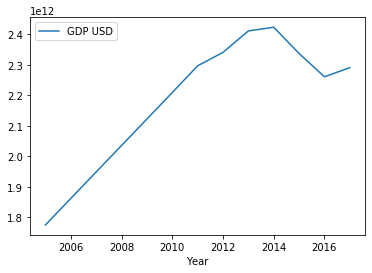

In [23]:
country_df = gdp_hdev_df[gdp_hdev_df['Country Code'] == 'BRA']
country_df.plot(kind='line', x='Year', y=['GDP USD'])